In [1]:
# warningsを無視する
import warnings
warnings.filterwarnings('ignore')

# 4.1 ライブラリのインポートとデータの読み込み

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_train = pd.read_csv("./input/train.csv")
df_test = pd.read_csv("./input/test.csv")
df_gender_submission = pd.read_csv("./input/gender_submission.csv")

In [4]:
# 本文にはない、レイアウト設定用
sns.set_palette("Blues_r", 3) # 青３色のスタイル
mpl.style.use('seaborn-white') # 背景が白いスタイル

# jupyter notebook用
% matplotlib inline  

# 日本語表示用 ##kaggleカーネルでは日本語表示できない
plt.rcParams["font.size"] = 20
plt.rcParams['font.family'] = 'IPAPGothic' 

# サイズの設定
plt.rcParams['figure.figsize'] = (8.0, 6.0)

# 4.2 データの概要を確認する
## 4.2.1 データフレームについて

In [6]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 4.2.2 データフレームの行数と列数を確認

In [7]:
print(df_train.shape) # 学習用データ
print(df_test.shape) # 本番予測用データ
print(df_gender_submission.shape) # 提出データのサンプル

(891, 12)
(418, 11)
(418, 2)


## 4.2.3 列の名前の確認

In [8]:
print(df_train.columns) # トレーニングデータの列名
print('-'*10) # 区切りを挿入
print(df_test.columns) # テストデータの列名

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
----------
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


## 4.2.4 df.info()で概要の確認

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## 4.2.5 df.head()で概要の確認

In [11]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 4.2.6 欠損値がいくつあるか確認

In [12]:
df_train.isnull().sum() 
# isnull()は、欠損値に対しTrueを返し、欠損値以外にはFalseを返す
# sum()は、Trueを1、Falseを0として合計する
# よってdf.isnull().sum()で欠損値を算出することができる

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## 4.2.7 要約統計量の表示

In [14]:
# df_trainとdf_Testを縦に連結
df_full = pd.concat([df_train, df_test], axis = 0, ignore_index=True)

display(df_full.shape) # df_fullの行数と列数を確認

df_full.describe() # df_fullの要約統計量

(1309, 12)

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [16]:
#percentilesにより、任意の分位点を指定可能
df_train.describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
10%,90.000000,0.000000,1.000000,14.000000,0.000000,0.000000,7.550000
20%,179.000000,0.000000,1.000000,19.000000,0.000000,0.000000,7.854200
30%,268.000000,0.000000,2.000000,22.000000,0.000000,0.000000,8.050000
40%,357.000000,0.000000,2.000000,25.000000,0.000000,0.000000,10.500000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
60%,535.000000,0.000000,3.000000,31.800000,0.000000,0.000000,21.679200


In [132]:
# df.describe(include = 'all')と書くと全てのデータについての要約統計量を表示することができます。
df_full.describe(include = 'all')

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
count,1046.000000,295,1307,1308.000000,1309,1309.000000,1309.000000,1309.000000,1309,1309.000000,891.000000,1309
unique,NaN,186,3,NaN,1307,NaN,NaN,NaN,2,NaN,NaN,929
top,NaN,C23 C25 C27,S,NaN,"Connolly, Miss. Kate",NaN,NaN,NaN,male,NaN,NaN,CA. 2343
freq,NaN,6,914,NaN,2,NaN,NaN,NaN,843,NaN,NaN,11
mean,29.881138,NaN,NaN,33.295479,NaN,0.385027,655.000000,2.294882,NaN,0.498854,0.383838,NaN
std,14.413493,NaN,NaN,51.758668,NaN,0.865560,378.020061,0.837836,NaN,1.041658,0.486592,NaN
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,1.000000,NaN,0.000000,0.000000,NaN
25%,21.000000,NaN,NaN,7.895800,NaN,0.000000,328.000000,2.000000,NaN,0.000000,0.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,655.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,39.000000,NaN,NaN,31.275000,NaN,0.000000,982.000000,3.000000,NaN,1.000000,1.000000,NaN


In [133]:
df_full.describe(include = "O")
#df.describe(include=['O'])と書くと、オブジェクト型のみを表示できる。

,Cabin,Embarked,Name,Sex,Ticket
count,295,1307,1309,1309,1309
unique,186,3,1307,2,929
top,C23 C25 C27,S,"Connolly, Miss. Kate",male,CA. 2343
freq,6,914,2,843,11


## 4.2.8 死亡者と生存者の可視化

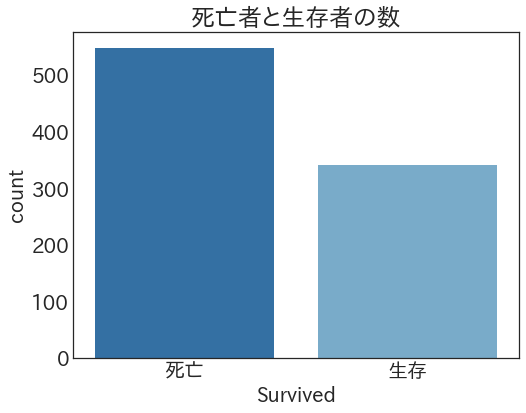

0    549
1    342
Name: Survived, dtype: int64

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [144]:
# 男女別の生存者数を可視化
sns.countplot(x='Survived', data=df_train)

plt.title("死亡者と生存者の数")
plt.xticks([0,1], ['死亡','生存'])
plt.show()

# 死亡者と生存者数を表示する
display(df_train['Survived'].value_counts())

# 死亡者と生存者割合を表示する
display(df_train['Survived'].value_counts()/len(df_train['Survived']))

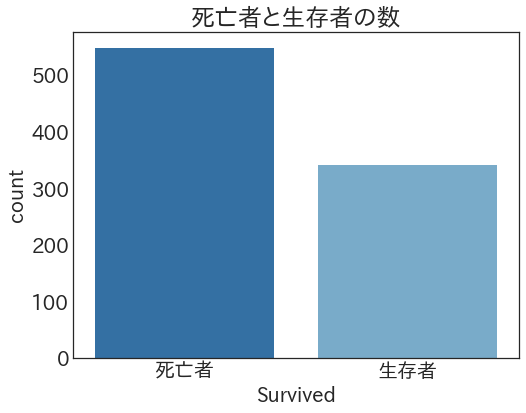

,Survived
Sex,
female,0.742038
male,0.188908


In [145]:
# 男女別の生存者数を可視化
sns.countplot(x='Survived', data=df_train)

#plt.xlabel("Survived", fontsize = 20)
#plt.ylabel("count", fontsize = 20)
plt.title("死亡者と生存者の数")
plt.xticks([0,1],["死亡者", "生存者"])
plt.show()

# 男女別の生存割合を表示する
df_train[['Sex','Survived']].groupby(['Sex']).mean()

## 性別

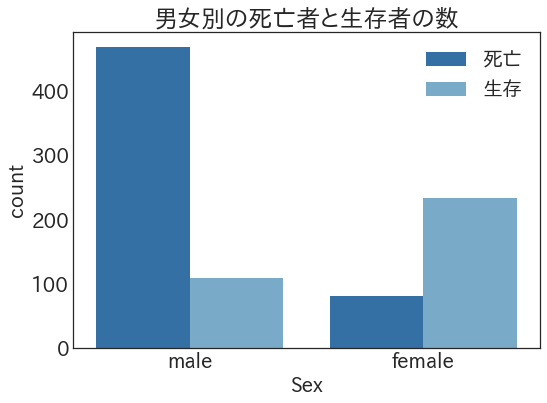

Survived,0,1
Sex,,
female,81,233
male,468,109


Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


In [149]:
sns.countplot(x='Sex', hue='Survived', data=df_train)

plt.title("男女別の死亡者と生存者の数")
plt.legend(["死亡","生存"])
plt.tight_layout()
plt.show()

# SexとSurvivedをクロス集計する
display(pd.crosstab(df_train['Sex'], df_train['Survived']))

# クロス集計しSexごとに正規化する
display(pd.crosstab(df_train['Sex'], df_train['Survived'],normalize = "index"))

## 4.2.9 チケットクラス

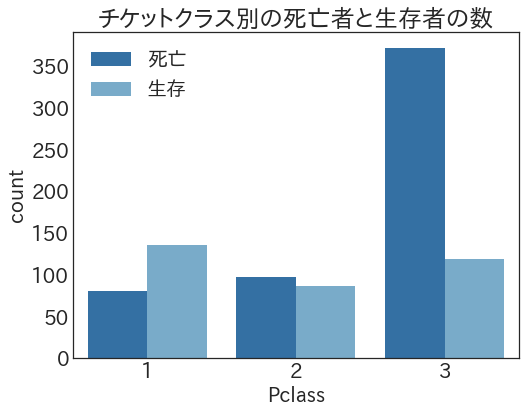

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


In [82]:
# チケットクラス別の生存者数を可視化
sns.countplot(x='Pclass', hue='Survived', data=df_train)
plt.title("チケットクラス別の死亡者と生存者の数")

plt.legend(["死亡","生存"])
plt.show()

# PclassとSurvivedをクロス集計する
display(pd.crosstab(df_train['Pclass'], df_train['Survived']))

# クロス集計しPclassごとに正規化する
display(pd.crosstab(df_train['Pclass'], df_train['Survived'],normalize = "index"))

## 4.2.10 年齢の分布

/home/hideki/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/hideki/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/hideki/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


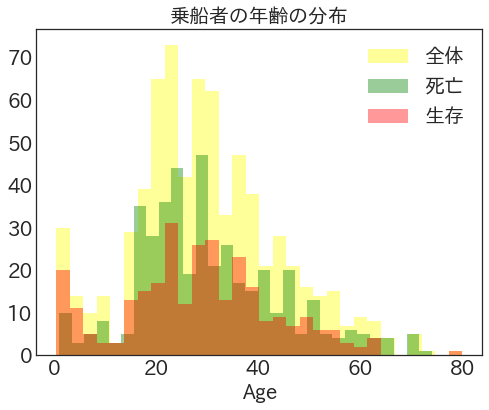

In [18]:
# 全体のヒストグラム
sns.distplot(df_train['Age'].dropna(), kde=False, bins = 30 ,color = "yellow",label="全体")
plt.title("乗船者の年齢の分布", fontsize = 20)

# 死亡者のヒストグラム
sns.distplot(df_train[df_train["Survived"] == 0].Age.dropna(), kde = False,bins=30,color = "green", label="死亡")

# 生存者のヒストグラム
sns.distplot(df_train[df_train["Survived"] == 1].Age.dropna(), kde = False,bins=30,color = "red", label="生存")

plt.legend();

In [152]:
# 年齢を８等分し、CategoricalAgeという変数を作成
df_train['CategoricalAge'] = pd.cut(df_train['Age'], 8)

# CategoricalAgeとSurvivedをクロス集計する
display(pd.crosstab(df_train['CategoricalAge'], df_train['Survived']))

# クロス集計しCategoricalAgeごとに正規化する
display(pd.crosstab(df_train['CategoricalAge'], df_train['Survived'],normalize = "index"))

Survived,0,1
CategoricalAge,,
"(0.34, 10.368]",26,38
"(10.368, 20.315]",71,44
"(20.315, 30.263]",146,84
"(30.263, 40.21]",86,69
"(40.21, 50.158]",53,33
"(50.158, 60.105]",25,17
"(60.105, 70.052]",13,4
"(70.052, 80.0]",4,1


Survived,0,1
CategoricalAge,,
"(0.34, 10.368]",0.406250,0.593750
"(10.368, 20.315]",0.617391,0.382609
"(20.315, 30.263]",0.634783,0.365217
"(30.263, 40.21]",0.554839,0.445161
"(40.21, 50.158]",0.616279,0.383721
"(50.158, 60.105]",0.595238,0.404762
"(60.105, 70.052]",0.764706,0.235294
"(70.052, 80.0]",0.800000,0.200000


## 4.2.11 タイタニック号に乗っている兄弟・配偶者の数

Text(0.5,1,'同乗している兄弟・配偶者の数')

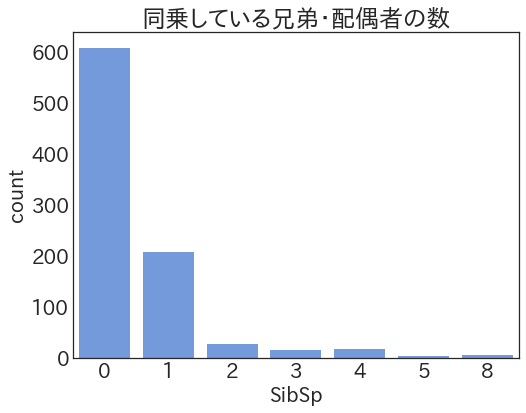

In [19]:
sns.countplot(x='SibSp', data = df_train, color='cornflowerblue')

plt.title("同乗している兄弟・配偶者の数")

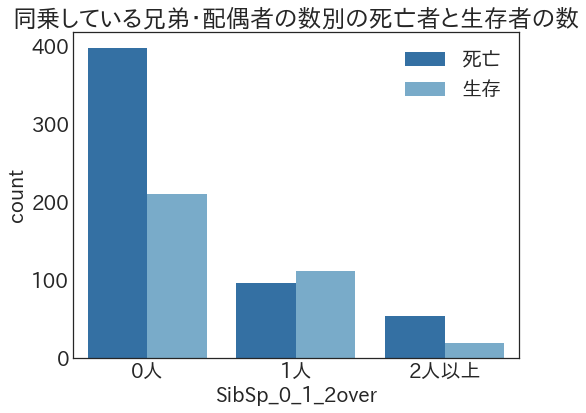

Survived,0,1
SibSp_0_1_2over,,
0,398,210
1,97,112
2,54,20


Survived,0,1
SibSp_0_1_2over,,
0,0.654605,0.345395
1,0.464115,0.535885
2,0.729730,0.270270


In [155]:
# SibSpが0か1であればそのまま、2以上であれば2である特徴量SibSp_0_1_2overを作成
df_train["SibSp_0_1_2over"] = [i if i <=1 else 2 for i in df_train["SibSp"]]

# SibSp_0_1_2overごとに集計し、可視化 
sns.countplot(x='SibSp_0_1_2over', hue='Survived', data=df_train)

plt.legend(["死亡","生存"])
plt.xticks([0,1,2],["0人","1人","2人以上"])
plt.title("同乗している兄弟・配偶者の数別の死亡者と生存者の数")
plt.show()

# SibSpとSurvivedをクロス集計する
display(pd.crosstab(df_train['SibSp_0_1_2over'], df_train['Survived']))

# クロス集計しSibSpごとに正規化する
display(pd.crosstab(df_train['SibSp_0_1_2over'], df_train['Survived'],normalize = "index"))

## 4.2.12 タイタニック号に乗っている両親・子供の数

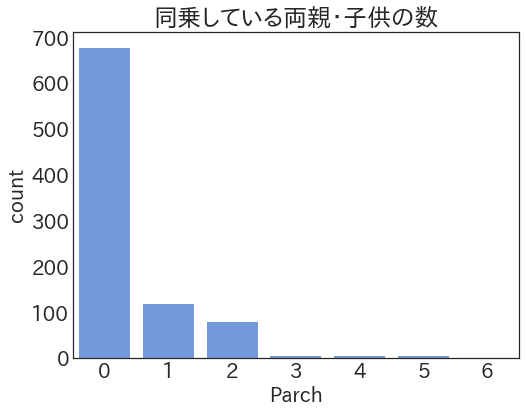

In [156]:
sns.countplot(x='Parch', data = df_train ,color='cornflowerblue')
plt.title("同乗している両親・子供の数");

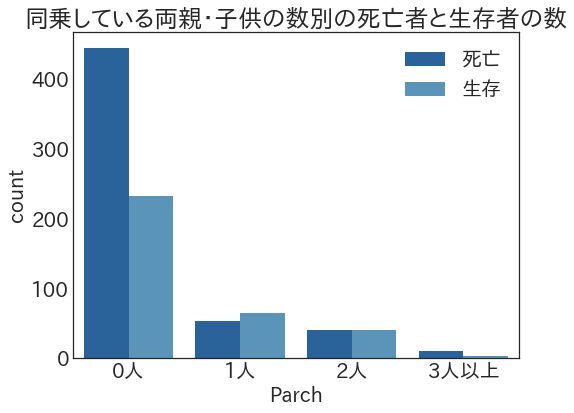

Survived,0,1
Parch_0_1_2_3over,,
0,445,233
1,53,65
2,40,40
3,11,4


Survived,0,1
Parch_0_1_2_3over,,
0,0.656342,0.343658
1,0.449153,0.550847
2,0.500000,0.500000
3,0.733333,0.266667


In [22]:
sns.set_palette("Blues_r", 4)

# 2以下であればそのままの数、3以上は3という変換を行う
df_train["Parch_0_1_2_3over"] = [i if i <=2 else 3 for i in df_train["Parch"]]

# Parch_0_1_2_3overごとに集計し可視化
sns.countplot(x="Parch_0_1_2_3over",hue="Survived", data = df_train)
plt.title("同乗している両親・子供の数別の死亡者と生存者の数")

plt.legend(["死亡","生存"])
plt.xticks([0, 1, 2, 3],["0人","1人","2人","3人以上"])

plt.xlabel('Parch')
plt.show()

# ParchとSurvivedをクロス集計する
display(pd.crosstab(df_train['Parch_0_1_2_3over'], df_train['Survived']))

# クロス集計しParchごとに正規化する
display(pd.crosstab(df_train['Parch_0_1_2_3over'], df_train['Survived'],normalize = "index"))


## 4.2.13 １人で乗船しているか２人以上で乗船しているか

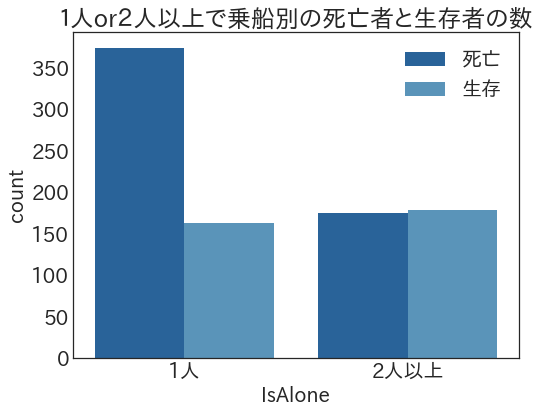

Survived,0,1
IsAlone,,
0,374,163
1,175,179


Survived,0,1
IsAlone,,
0,0.696462,0.303538
1,0.494350,0.505650


In [102]:
#SibSpとParchが同乗している家族の数。1を足すと家族の人数となる
df_train['FamilySize']=df_train['SibSp']+ df_train['Parch']+ 1

# IsAloneを0とし、2行目でFamilySizeが2以上であれば1にしている
df_train['IsAlone'] = 0
df_train.loc[df_train['FamilySize'] >= 2, 'IsAlone'] = 1

# IsAloneごとに可視化
sns.countplot(x="IsAlone",hue="Survived",data=df_train)

plt.xticks([0,1],['1人','2人以上'])

plt.legend(["死亡","生存"])
plt.title("１人or２人以上で乗船別の死亡者と生存者の数")
plt.show()

# IsAloneとSurvivedをクロス集計する
display(pd.crosstab(df_train['IsAlone'], df_train['Survived']))

# クロス集計しIsAloneごとに正規化する
display(pd.crosstab(df_train['IsAlone'], df_train['Survived'],normalize = "index"))

## 4.2.14 運賃の分布

/home/hideki/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


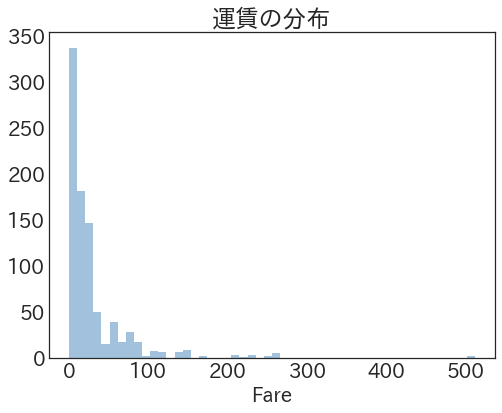

In [23]:
sns.distplot(df_train['Fare'].dropna(),kde = False,hist=True);

plt.title("運賃の分布");

In [24]:
df_train['CategoricalFare'] = pd.qcut(df_train['Fare'], 4)
df_train[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index=False).mean()

# CategoricalFareとSurvivedをクロス集計する
display(pd.crosstab(df_train['CategoricalFare'], df_train['Survived']))

# クロス集計しCategoricalFareごとに正規化する
display(pd.crosstab(df_train['CategoricalFare'], df_train['Survived'],normalize = "index"))

Survived,0,1
CategoricalFare,,
"(-0.001, 7.91]",179,44
"(7.91, 14.454]",156,68
"(14.454, 31.0]",121,101
"(31.0, 512.329]",93,129


Survived,0,1
CategoricalFare,,
"(-0.001, 7.91]",0.802691,0.197309
"(7.91, 14.454]",0.696429,0.303571
"(14.454, 31.0]",0.545045,0.454955
"(31.0, 512.329]",0.418919,0.581081


## 4.2.15 名前

In [107]:
df_test['Name'][0:5]

0                                Kelly, Mr. James
1                Wilkes, Mrs. James (Ellen Needs)
2                       Myles, Mr. Thomas Francis
3                                Wirz, Mr. Albert
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)
Name: Name, dtype: object

In [108]:
# 敬称を抽出し、重複を省く
set(df_train.Name.str.extract(' ([A-Za-z]+)\.', expand=False))

{'Capt',
 'Col',
 'Countess',
 'Don',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir'}

In [109]:
# collections.Counterを使用して、数え上げる
import collections
collections.Counter(df_train.Name.str.extract(' ([A-Za-z]+)\.', expand=False))

Counter({'Mr': 517,
         'Mrs': 125,
         'Miss': 182,
         'Master': 40,
         'Don': 1,
         'Rev': 6,
         'Dr': 7,
         'Mme': 1,
         'Ms': 1,
         'Major': 2,
         'Lady': 1,
         'Sir': 1,
         'Mlle': 2,
         'Col': 2,
         'Capt': 1,
         'Countess': 1,
         'Jonkheer': 1})

In [111]:
# df_trainにTitle列を作成、Title列の値は敬称
df_train['Title'] = df_train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

# df_testにTitle列を作成、Title列の値は敬称
df_test['Title'] = df_test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

# df_trainのTitle列の値ごとに平均値を算出
df_train.groupby('Title').mean()['Age']

Title
Capt        70.000000
Col         58.000000
Countess    33.000000
Don         40.000000
Dr          42.000000
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       4.574167
Miss        21.773973
Mlle        24.000000
Mme         24.000000
Mr          32.368090
Mrs         35.898148
Ms          28.000000
Rev         43.166667
Sir         49.000000
Name: Age, dtype: float64

In [99]:
# 変換するための関数を作成
def title_to_num(title):
    if title == 'Master':
        return 1
    elif title == 'Miss':
        return 2
    elif title == 'Mr':
        return 3
    elif title == 'Mrs':
        return 4
    else:
        return 5

# リスト内包表記を用いて変換
df_train['Title_num'] = [title_to_num(i) for i in df_train['Title']]
df_test['Title_num'] = [title_to_num(i) for i in df_test['Title']]